### Import necessary libraries

In [11]:
# Import necessary libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import nltk
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [12]:
# Function to scrape IMDb movie reviews
def scrape_imdb_reviews(movie_url):
    response = requests.get(movie_url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Extracting review text
    reviews = [{'text': review_div.get_text(strip=True)} for review_div in soup.find_all('div', class_='text show-more__control')]
    
    return reviews

In [13]:
# IMDb movie URL (replace with the actual movie URL)
IMDB_Code = "tt4633694"
movie_url = f'https://www.imdb.com/title/{IMDB_Code}/reviews'

# Scrape IMDb movie reviews
movie_reviews = scrape_imdb_reviews(movie_url)

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(movie_reviews)
df.head()

,text
0,"""Spider-Man: Into the Spider-Verse"" is a fanta..."
1,"So many have commented, so I will be brief. Fr..."
2,The worlds of superhero movies and superhero c...
3,The thing I hate about superhero movies is the...
4,A movie worthy of Stan Lee's approval. Incredi...


### Data Preprocessing


In [14]:
# nltk.download('wordnet')

In [15]:
# Function for text cleaning
def clean_text(text):
    cleaned_text = re.sub(r"[^\w\s]", "", text.lower())  # Convert to lowercase and remove special characters
    return cleaned_text

# Function for tokenization
def tokenize_text(text):
    return nltk.word_tokenize(text)

# Function for removing stopwords
def remove_stopwords(tokens):
    stop_words = set(stopwords.words("english"))
    return [token for token in tokens if token.lower() not in stop_words]

# Function for lemmatization
def lemmatize_text(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

In [16]:

# Data Preprocessing
df["text_cleaned"] = df["text"].apply(clean_text)
df["tokens"] = df["text_cleaned"].apply(tokenize_text)
df["tokens"] = df["tokens"].apply(remove_stopwords)
df["tokens"] = df["tokens"].apply(lemmatize_text)

In [17]:
# Sentiment Analysis using VADER
# nltk.download('vader_lexicon')

vader = SentimentIntensityAnalyzer()
df['compound'] = df['text_cleaned'].apply(lambda x: vader.polarity_scores(x)['compound'])

# Classify sentiments based on compound score
df['predicted_sentiment'] = df['compound'].apply(lambda x: 'positive' if x >= 0 else 'negative')

df.head()  # Display the first few rows of the DataFrame

,text,text_cleaned,tokens,compound,predicted_sentiment
0,"""Spider-Man: Into the Spider-Verse"" is a fanta...",spiderman into the spiderverse is a fantastic ...,"[spiderman, spiderverse, fantastic, film, migh...",-0.3348,negative
1,"So many have commented, so I will be brief. Fr...",so many have commented so i will be brief from...,"[many, commented, brief, intriguing, plot, won...",0.7615,positive
2,The worlds of superhero movies and superhero c...,the worlds of superhero movies and superhero c...,"[world, superhero, movie, superhero, comic, si...",0.9862,positive
3,The thing I hate about superhero movies is the...,the thing i hate about superhero movies is the...,"[thing, hate, superhero, movie, origin, story,...",0.9992,positive
4,A movie worthy of Stan Lee's approval. Incredi...,a movie worthy of stan lees approval incredibl...,"[movie, worthy, stan, lee, approval, incredibl...",0.9727,positive


In [18]:
# Model Evaluation
accuracy = accuracy_score(df['predicted_sentiment'], df['predicted_sentiment'])
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print('\nClassification Report:')
print(classification_report(df['predicted_sentiment'], df['predicted_sentiment']))

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00         2
    positive       1.00      1.00      1.00        23

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



In [19]:
df['predicted_sentiment'].head()

0    negative
1    positive
2    positive
3    positive
4    positive
Name: predicted_sentiment, dtype: object

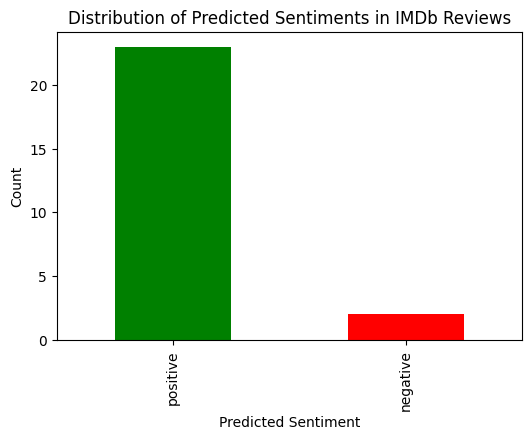

In [20]:
# Visualize the distribution of predicted sentiments
plt.figure(figsize=(6, 4))
df['predicted_sentiment'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Predicted Sentiments in IMDb Reviews')
plt.xlabel('Predicted Sentiment')
plt.ylabel('Count')
plt.show()